# Reorder the dataset for convenience

In [3]:
import pandas as pd
import numpy as np

In [4]:
path = "../Clean Data/consumption_with_climate_score.csv"
df = pd.read_csv(path)

df.head()

,Station,gantry,Latitude,Longitude,Lane Count,Month,Estimated Monthly Consumption (kWh),ClimateType
0,后里,01F-104.5N,24.727131,120.951897,3.0,5,1738.5,-0.737638
1,后里,01F-104.5N,24.727131,120.951897,3.0,6,1738.5,-0.429355
2,后里,01F-104.5N,24.727131,120.951897,3.0,7,1908.0,-0.313095
3,后里,01F-104.5N,24.727131,120.951897,3.0,8,1908.0,0.086170
4,后里,01F-104.5N,24.727131,120.951897,3.0,9,1796.0,-0.371253


In [5]:
# Move 'Estimated Monthly Consumption (kWh)' to the end
col = 'Estimated Monthly Consumption (kWh)'
df = df[[c for c in df.columns if c != col] + [col]]

df.head()


,Station,gantry,Latitude,Longitude,Lane Count,Month,ClimateType,Estimated Monthly Consumption (kWh)
0,后里,01F-104.5N,24.727131,120.951897,3.0,5,-0.737638,1738.5
1,后里,01F-104.5N,24.727131,120.951897,3.0,6,-0.429355,1738.5
2,后里,01F-104.5N,24.727131,120.951897,3.0,7,-0.313095,1908.0
3,后里,01F-104.5N,24.727131,120.951897,3.0,8,0.086170,1908.0
4,后里,01F-104.5N,24.727131,120.951897,3.0,9,-0.371253,1796.0


In [13]:
df = pd.read_csv("../Clean Data/reorder_consumption_with_climate_label.csv")
df.head()

,Unnamed: 0,Station,gantry,Latitude,Longitude,Lane Count,Month,ClimateType,Estimated Monthly Consumption (kWh)
0,0,后里,01F-104.5N,24.727131,120.951897,3.0,5,-1,1738.5
1,1,后里,01F-104.5N,24.727131,120.951897,3.0,6,-1,1738.5
2,2,后里,01F-104.5N,24.727131,120.951897,3.0,7,-1,1908.0
3,3,后里,01F-104.5N,24.727131,120.951897,3.0,8,-1,1908.0
4,4,后里,01F-104.5N,24.727131,120.951897,3.0,9,-1,1796.0


In [14]:
df = df.drop(columns=["Unnamed: 0"])

df.head()

,Station,gantry,Latitude,Longitude,Lane Count,Month,ClimateType,Estimated Monthly Consumption (kWh)
0,后里,01F-104.5N,24.727131,120.951897,3.0,5,-1,1738.5
1,后里,01F-104.5N,24.727131,120.951897,3.0,6,-1,1738.5
2,后里,01F-104.5N,24.727131,120.951897,3.0,7,-1,1908.0
3,后里,01F-104.5N,24.727131,120.951897,3.0,8,-1,1908.0
4,后里,01F-104.5N,24.727131,120.951897,3.0,9,-1,1796.0


In [6]:
df.to_csv("../Clean Data/reorder_consumption_with_climate_score.csv", index=False)

# Model

In [7]:
df = pd.read_csv("../Clean Data/reorder_consumption_with_climate_score.csv")
print(df.head(5))

  Station      gantry   Latitude   Longitude  Lane Count  Month  ClimateType  \
0      后里  01F-104.5N  24.727131  120.951897         3.0      5    -0.737638   
1      后里  01F-104.5N  24.727131  120.951897         3.0      6    -0.429355   
2      后里  01F-104.5N  24.727131  120.951897         3.0      7    -0.313095   
3      后里  01F-104.5N  24.727131  120.951897         3.0      8     0.086170   
4      后里  01F-104.5N  24.727131  120.951897         3.0      9    -0.371253   

   Estimated Monthly Consumption (kWh)  
0                               1738.5  
1                               1738.5  
2                               1908.0  
3                               1908.0  
4                               1796.0  


In [8]:
regression_dataset_df = df.drop(columns=["Station", "gantry"])

regression_dataset_df.head()

#regression_dataset_df.to_csv("../Clean Data/regression_dataset.csv")


,Latitude,Longitude,Lane Count,Month,ClimateType,Estimated Monthly Consumption (kWh)
0,24.727131,120.951897,3.0,5,-0.737638,1738.5
1,24.727131,120.951897,3.0,6,-0.429355,1738.5
2,24.727131,120.951897,3.0,7,-0.313095,1908.0
3,24.727131,120.951897,3.0,8,0.086170,1908.0
4,24.727131,120.951897,3.0,9,-0.371253,1796.0


In [9]:
regression_dataset_df.to_csv("../Clean Data/regression_dataset.csv")

# Define Dataset, define feature and target split

In [10]:
regression_dataset_df.head()

,Latitude,Longitude,Lane Count,Month,ClimateType,Estimated Monthly Consumption (kWh)
0,24.727131,120.951897,3.0,5,-0.737638,1738.5
1,24.727131,120.951897,3.0,6,-0.429355,1738.5
2,24.727131,120.951897,3.0,7,-0.313095,1908.0
3,24.727131,120.951897,3.0,8,0.086170,1908.0
4,24.727131,120.951897,3.0,9,-0.371253,1796.0


In [11]:
X = regression_dataset_df[["Latitude", "Longitude", "Lane Count", "Month", "ClimateType"]]
y = regression_dataset_df["Estimated Monthly Consumption (kWh)"]

# Import Libraries

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Full Regression Model pipeline

In [8]:
# Load your data
df = pd.read_csv("../Clean Data/regression_dataset.csv")

# Select features and target
X = df[["Latitude", "Longitude", "Lane Count", "Month", "ClimateType"]]
y = df["Estimated Monthly Consumption (kWh)"]

# Split data (simple random split; replace with group-wise split if needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} kWh")
print(f"R² Score: {r2:.2f}")

MAE: 66.85 kWh
R² Score: 0.92


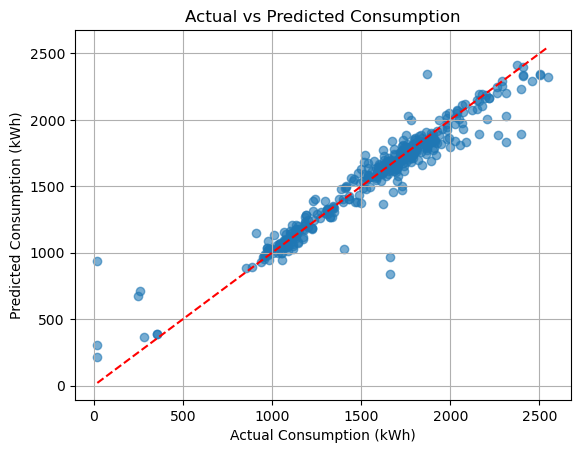

In [9]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Consumption (kWh)")
plt.ylabel("Predicted Consumption (kWh)")
plt.title("Actual vs Predicted Consumption")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()


In [45]:
importances = model.feature_importances_
feature_names = X.columns
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.3f}")


Latitude: 0.377
Longitude: 0.319
Lane Count: 0.220
Month: 0.035
ClimateType: 0.049


In [46]:
import joblib
joblib.dump(model, "Exports/Consumption Model/random_forest_consumption_model_location_month_lane_climate.pkl")


['Exports/Consumption Model/random_forest_consumption_model_location_month_lane_climate.pkl']

# Load and Test Model

In [47]:
import joblib
import numpy as np

# 24.727131,120.951897,3.0,5,-1,1738.5

# Load the saved model
model = joblib.load("Exports/Consumption Model/random_forest_consumption_model_location_month_lane_climate.pkl")

# Input: [Latitude, Longitude, Lane Count, Month, ClimateType]
sample_input = np.array([[24.727131, 120.951897, 3.0, 5, 0]])

# Predict
predicted_consumption = model.predict(sample_input)
print(f"Predicted Monthly Consumption: {predicted_consumption[0]:.2f} kWh")


Predicted Monthly Consumption: 1799.91 kWh


d:\Anaconda\Anaconda\envs\MachineLearning\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
